# Global Deviation and Frequency Analysis (GDFA)

## Overview
This script is designed for a multi-country and multi-round analysis of DIEM (Data in Emergencies) monitoring data, aggregated at the first administrative level, typically corresponding to the country level. The data, derived from household surveys, provides insights into various indicators reflecting conditions in each country. 

## Goal
The primary objective of the script is to analyze the frequency at which specific countries' data fall into extreme ranges for each indicator. This analysis identifies not just the outliers but also the regularity of these occurrences, which offers insights into persistent patterns or anomalies in the data. It's important to note that for some indicators, low values might be indicative of positive outcomes (e.g. only a few houhseholds reporting a recent drought), while for others, high values might be favorable (e.g. the majority of the houhseholds having a high dietary diversity score). Therefore, the script  starts with **section 1** where, after having computed the average and identified the outliers at each indicator's level, it generates histograms for both high and low extremes to provide a comprehensive view of each country's performance across different indicators.

Following the individual analysis of each indicator, in **section 2** the script compiles a cumulative chart that aggregates occurrences of extreme values across all indicators, providing a holistic view of each country's frequency of encountering extreme conditions (both extremely high and low values). 

Furthermore, in **section 3**, by identifying wheter it's beneficial to have high or low values for each indicator, the script also produces a 'Negative extremes' chart. This chart focuses on the count and frequency of countries experiencing undesirable extremes, wether they are too high or too low, based on the nature of the indicator. This nuanced approach is essential for understanding which countries consistently encounter specific challenges, and it helps to highlight areas requiring attention or intervention.

Section 1 and 2 focus in details on a single group of indicators, that we refer as **"Crop production difficulties"** thematic area. Section 3 exapnds the previous operations to 7 different thematic areas (**"Crop production difficulties"**, **"Crop sales difficulties"**, **"Livestock production difficulties"**, **"Livestock sales difficulties"**, **"Shocks"**, **"Needs"**, **"Food Security Outcomes"**) and, instead of providing single-indicator's charts, it summarizes the results at themati area level, with a set of new dedicated charts.

## Data Source
The export of the multi-country aggregated DIEM data used in this exercise can be accessed an a dedicated page of the [Data in Emergencies Hub](https://data-in-emergencies.fao.org/datasets/b9080d42e82e4add8130c416f10d0888/explore). In order to fully leverage the dataset, it may be necessary to carefully read the [Wiki document](https://data-in-emergencies.fao.org/documents/hqfao::data-in-emergencies-monitoring-system-wiki-general-dec-2023/explore), [field descriptions](https://hqfao.maps.arcgis.com/sharing/rest/content/items/04287fcadb994341b0b70d19c8a02035/data), [questionnaires](https://data-in-emergencies.fao.org/explore?sort=Date%20Created%7Ccreated%7Cdesc&tags=household%20survey%20questionnaire), and [detailed metadata](https://hqfao.maps.arcgis.com/sharing/rest/content/items/01595314154948719aca7325d88c782a/data). In particular, the [field descriptions](https://hqfao.maps.arcgis.com/sharing/rest/content/items/04287fcadb994341b0b70d19c8a02035/data) file is an input for the script and provides the necessary explanation of each variable considered.


## Overall methodology

This script employs a multi-step methodology to provide a comprehensive analysis of the DIEM monitoring data:

1. **Threshold Calculation** (Section 1): 
   - **Method**: Applies percentile, standard deviation, or equal interval methods to determine high and low thresholds for each indicator. This method is crucial for identifying extreme values that deviate significantly from the norm.
   - **Interpretation**: Thresholds help to pinpoint extreme data points, essential for understanding outlier behavior in the dataset.
2. **Individual Variable-Country Charting** (Section 1):
   - **Method**: Generates line plots for each country displaying the progression of an indicator over time. High and low thresholds are marked on these charts.
   - **Interpretation**: These charts visualize the temporal dynamics of each indicator, helping identify trends, patterns, and anomalies in country-specific data.
3. **Histograms for High and Low Extremes** (Section 1):
   - **Method**: For each variable, the script creates two histograms – one showing the count and frequency of countries’ values exceeding the high threshold, and another for values below the low threshold.
   - **Interpretation**: These histograms quantify how often countries experience extreme values, either high or low, providing insights into the frequency of such occurrences.
4. **Cumulative Extremes Chart** (Section 2):
   - **Method**: Aggregates the occurrences of extreme values across all indicators for each country (both high and low values), displaying both the total count and frequency.
   - **Interpretation**: This chart offers a holistic view of a country's propensity towards extremes, highlighting those consistently encountering extreme conditions across various indicators.
5. **Negative Extremes Chart** (Section 3):
   - **Method**: After specifying which indicators are positively associated with high values, this chart counts and quantifies the frequency of countries with negative (undesirable) extreme values.
   - **Interpretation**: It helps to identify countries frequently facing adverse conditions, emphasizing the indicators where high values are typically seen as positive.
   - Note: Negative Extremes Chart is created for each of the 7 thematic areas.


## Section 1

The first section begins by setting user options, such as the method of classification (percentiles, standard deviation, or equal intervals), along with specific parameters for these methods like the percentile value or the number of standard deviations.

The data for analysis is loaded from a specified CSV file. The script then initializes dictionaries to store cumulative counts and total data points for high and low extremes for each country.

In the main loop, for each variable of interest, the script:

1. **Retrieves a Description**: For the variable from a pre-loaded field description DataFrame.
   
2. **Calculates Thresholds**: Based on the chosen method (percentiles, std_dev, or equal_interval). These thresholds are used to define what constitutes an 'extreme' value.

3. **Country-Level Analysis**: For each country, calculates the count of data points that fall above the high threshold and below the low threshold. These counts are accumulated in the respective cumulative count dictionaries.

4. **Generates Line Plot**: For each country, showing the variable values over time. Horizontal lines are drawn at the calculated thresholds to visually identify extremes.

5. **Generates Histograms**: After processing all countries for a variable, histograms are generated showing the frequency of each country's data points above the high threshold and below the low threshold.

This process is repeated for each variable of **"Crop production difficulties"** thematic area, providing a comprehensive analysis of how frequently each country's data falls into extreme ranges across various indicators.

## Usage
To use the script, ensure that `data_file_path` contains the path to the DIEM monitoring data and that variable `var_desc_file` contains the field description file path. Adjust user options according to analysis requirements. The script outputs plots, histograms, and a final chart detailing the frequency and nature of extreme values across different countries, highlighting those consistently facing challenges or excelling in specific areas.


## User Options

- `percentile`: The percentile considered as a threshold for the 'percentiles' method.
- `num_std_dev`: The number of standard deviations from the mean for the 'std_dev' method.
- `num_classes`: The number of classes for the 'equal_interval' method.
- `method`: The classification method: 'percentiles', 'std_dev', or 'equal_interval'.
- `positive_high_value_vars`: List of variables where high values are positive'.

Classification methods:
- **Percentiles**: Data is classified based on specified high and low percentiles (e.g., 90th and 10th percentiles), highlighting countries in the top or bottom percentages for each indicator.
- **Standard Deviation (std_dev)**: Thresholds are set at specified multiples of standard deviation from the mean, pinpointing outliers.
- **Equal Interval**: Data range is divided into equal intervals, with thresholds at interval boundaries.


Variable name : crp_proddif_plant_disease
Variable description : Percentage of households that, for question asked: 'Which difficulty has your household faced with crop production in #season#?', have answered: 'Plant disease'. #season# will be replaced with the country specific information (e.g. wet season, monsoon season, harvest season, etc...).



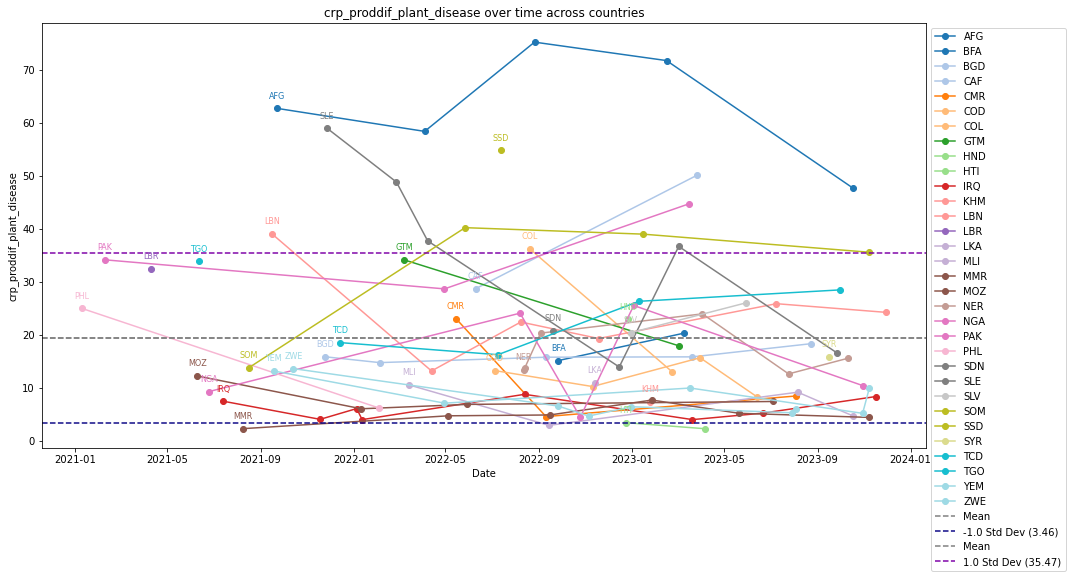

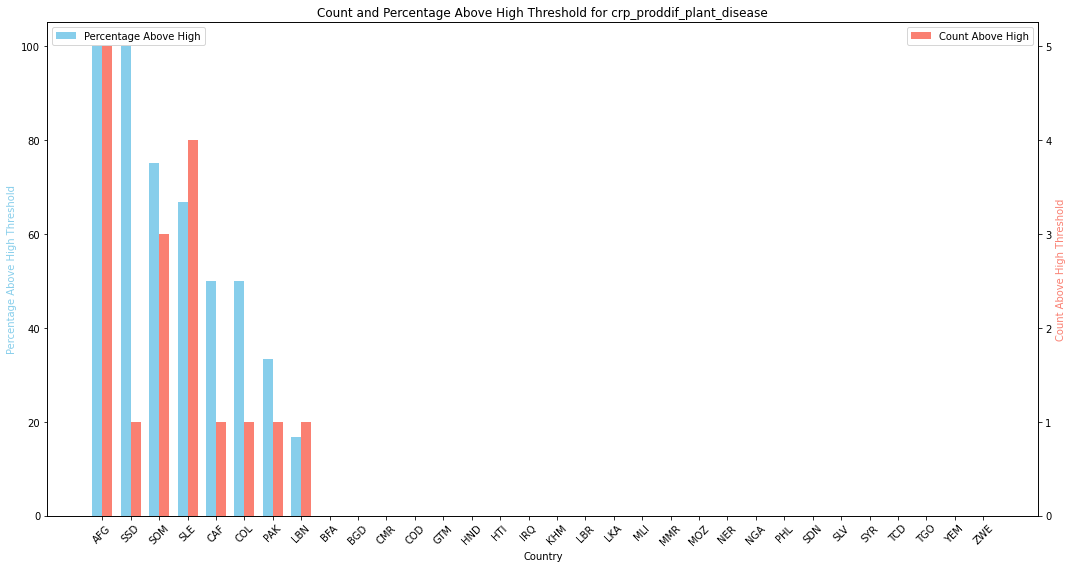

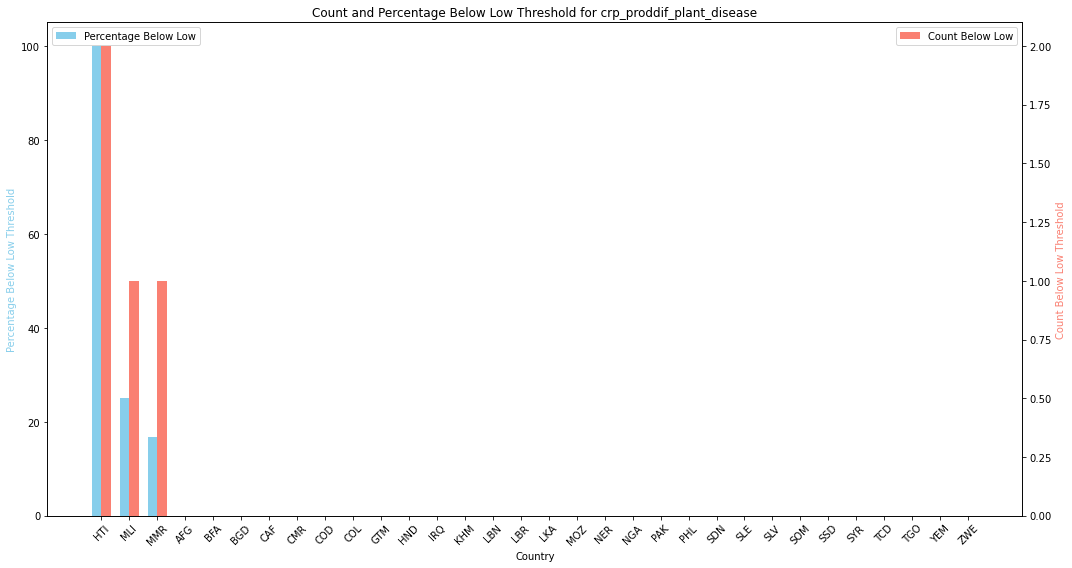


Variable name : crp_proddif_seed_quality
Variable description : Percentage of households that, for question asked: 'Which difficulty has your household faced with crop production in #season#?', have answered: 'Access to quality seeds'. #season# will be replaced with the country specific information (e.g. wet season, monsoon season, harvest season, etc...).



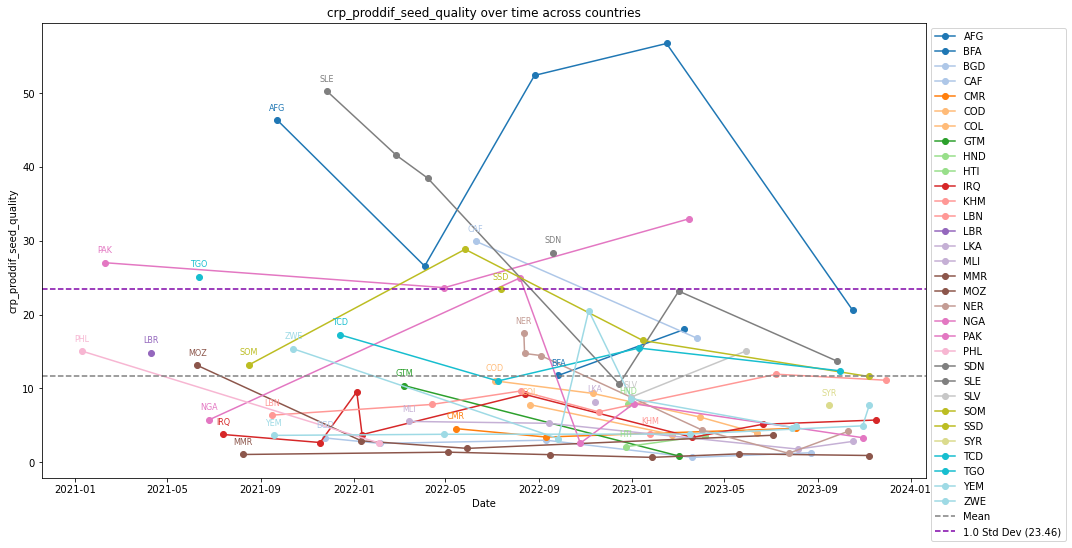

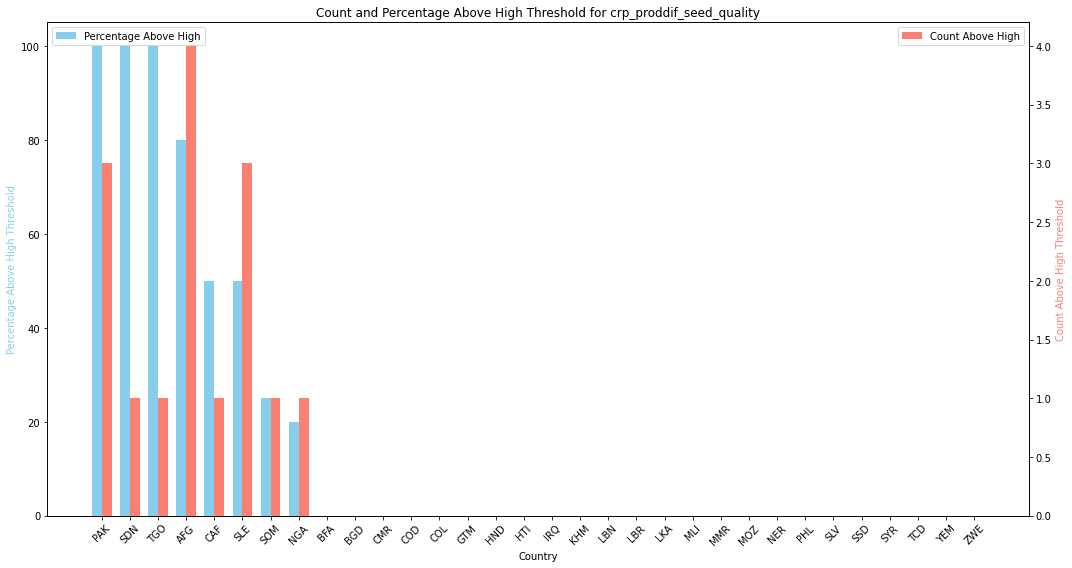

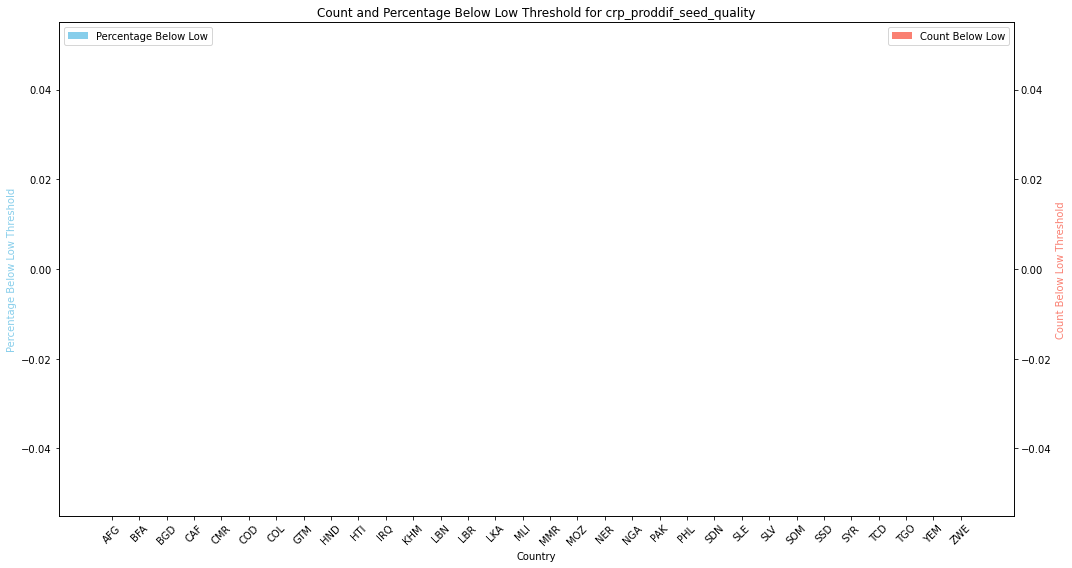


Variable name : crp_proddif_seed_quantity
Variable description : Percentage of households that, for question asked: 'Which difficulty has your household faced with crop production in #season#?', have answered: 'Access to enough seeds (not available on markets or prices too high)'. #season# will be replaced with the country specific information (e.g. wet season, monsoon season, harvest season, etc...).



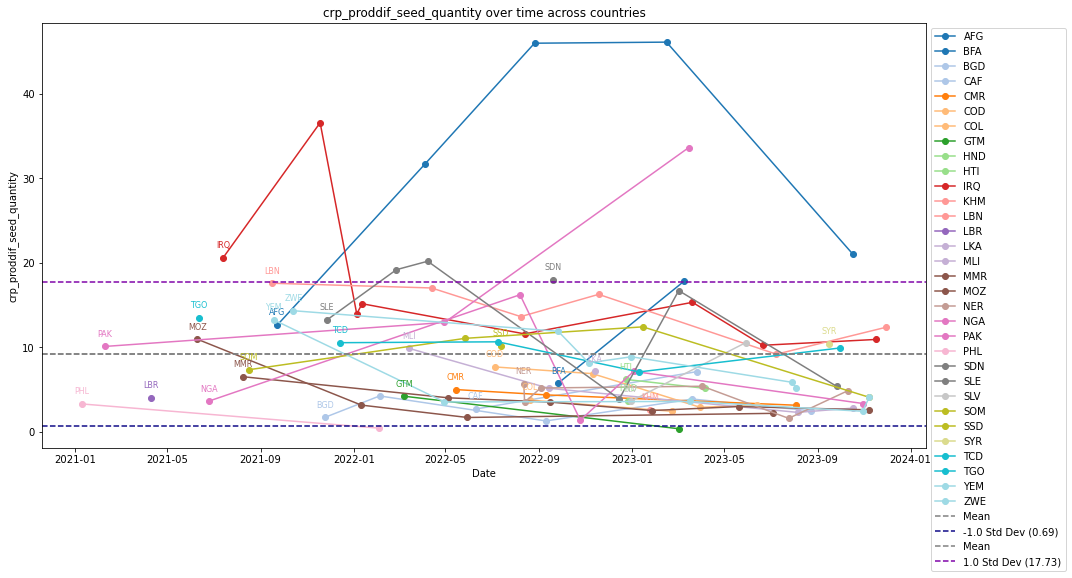

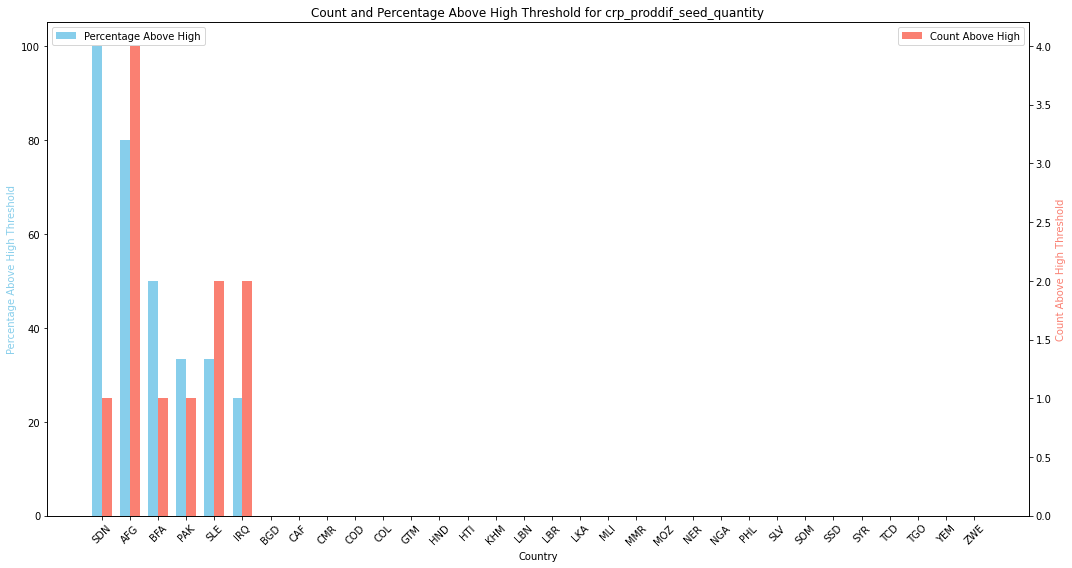

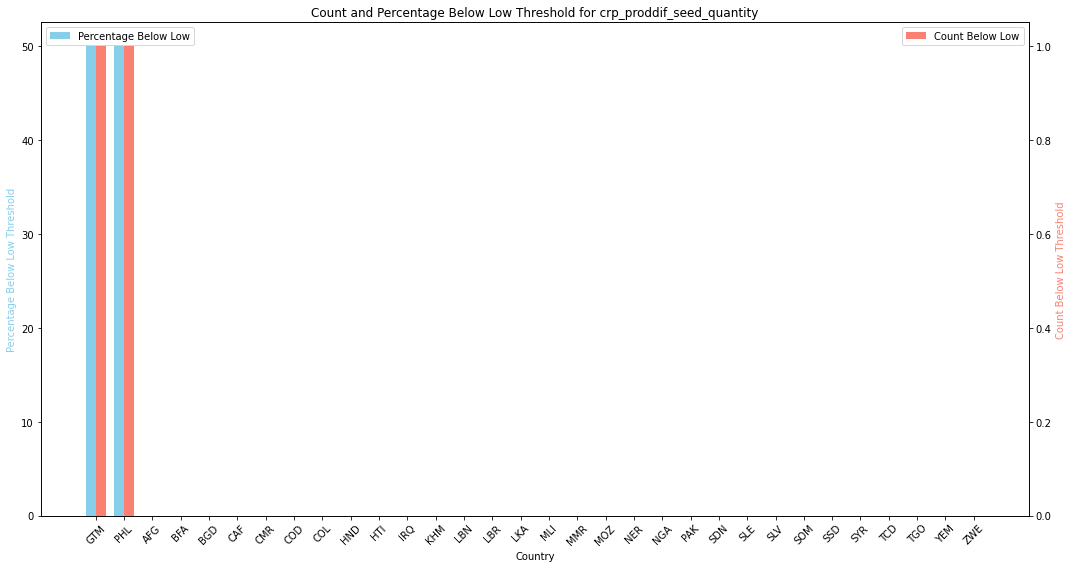


Variable name : crp_proddif_soil_erosion
Variable description : Percentage of households that, for question asked: 'Which difficulty has your household faced with crop production in #season#?', have answered: 'Soil erosion'. #season# will be replaced with the country specific information (e.g. wet season, monsoon season, harvest season, etc...).



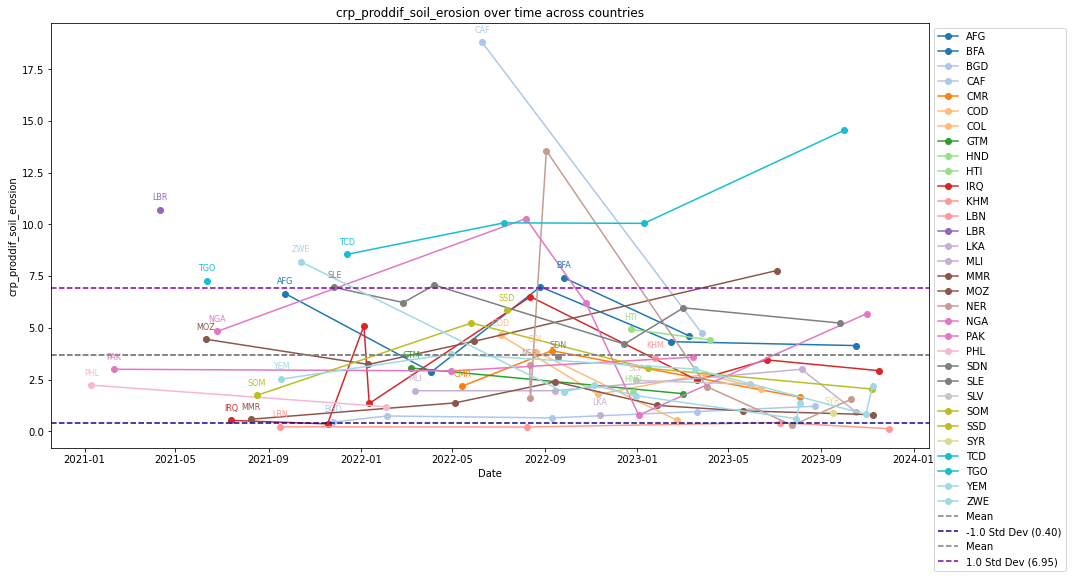

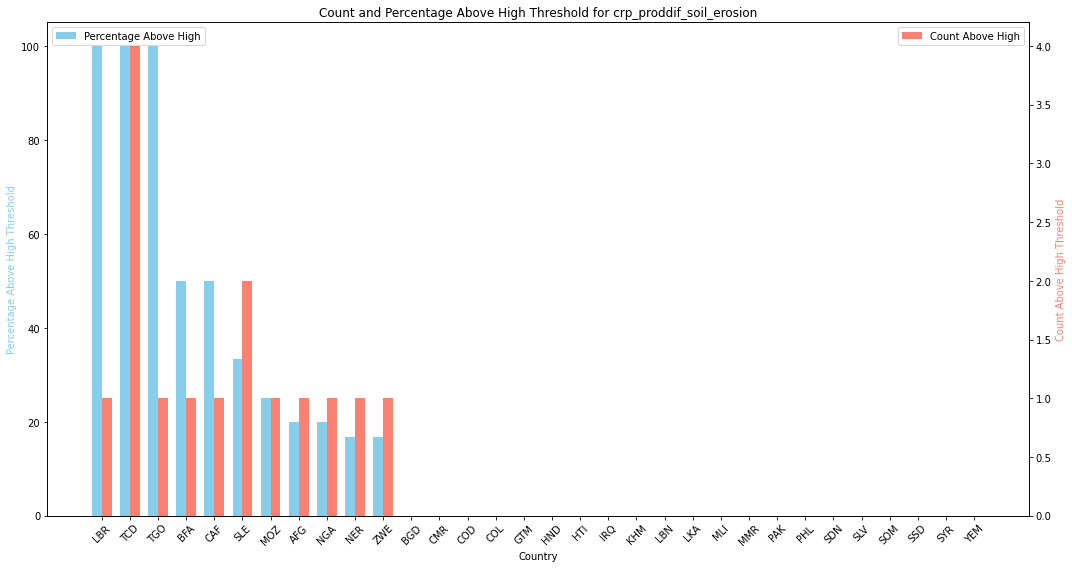

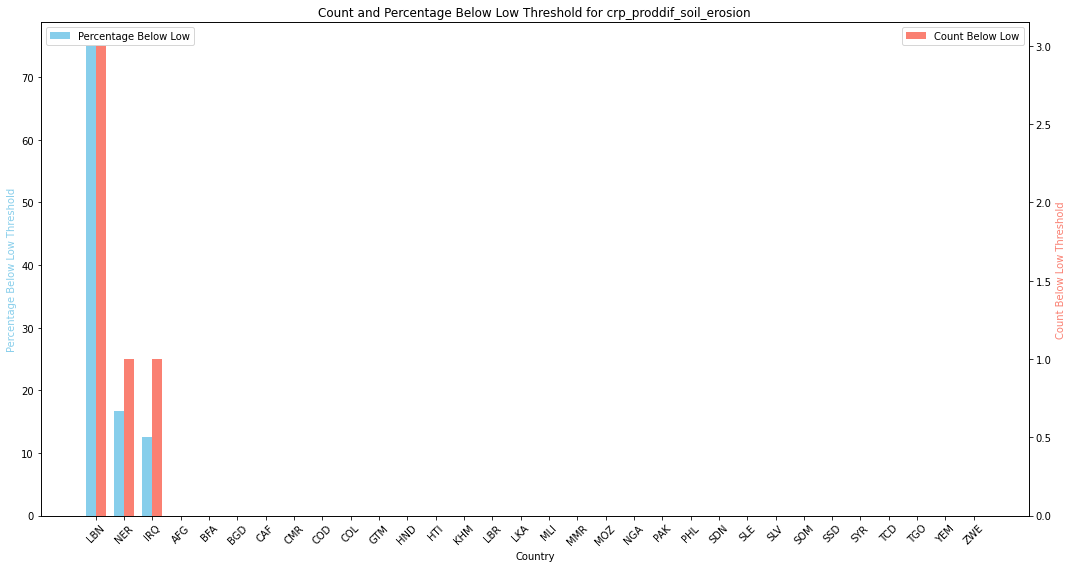


Variable name : crp_proddif_access_plot
Variable description : Percentage of households that, for question asked: 'Which difficulty has your household faced with crop production in #season#?', have answered: 'Access to plot'. #season# will be replaced with the country specific information (e.g. wet season, monsoon season, harvest season, etc...).



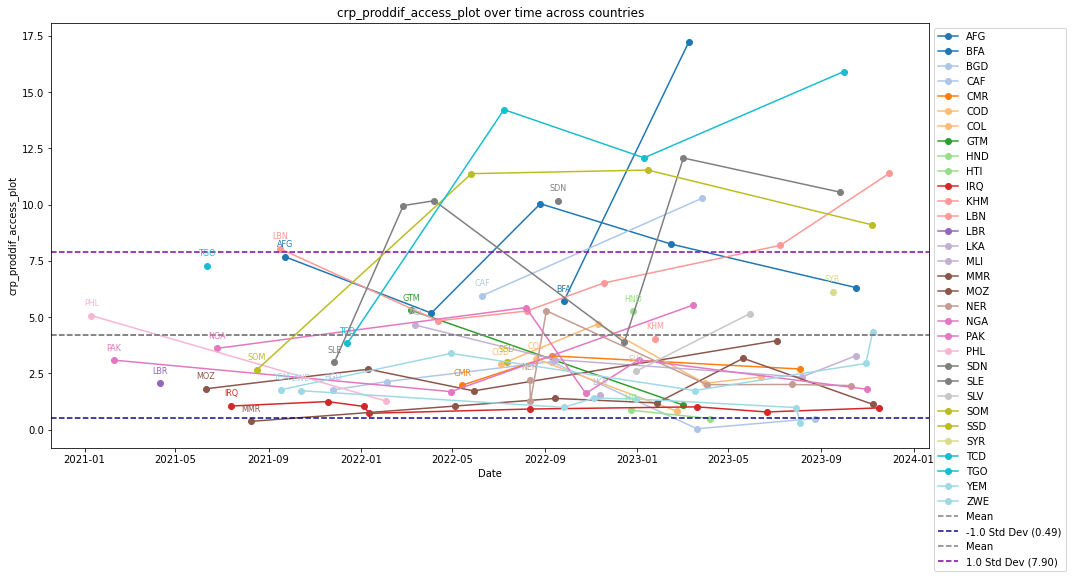

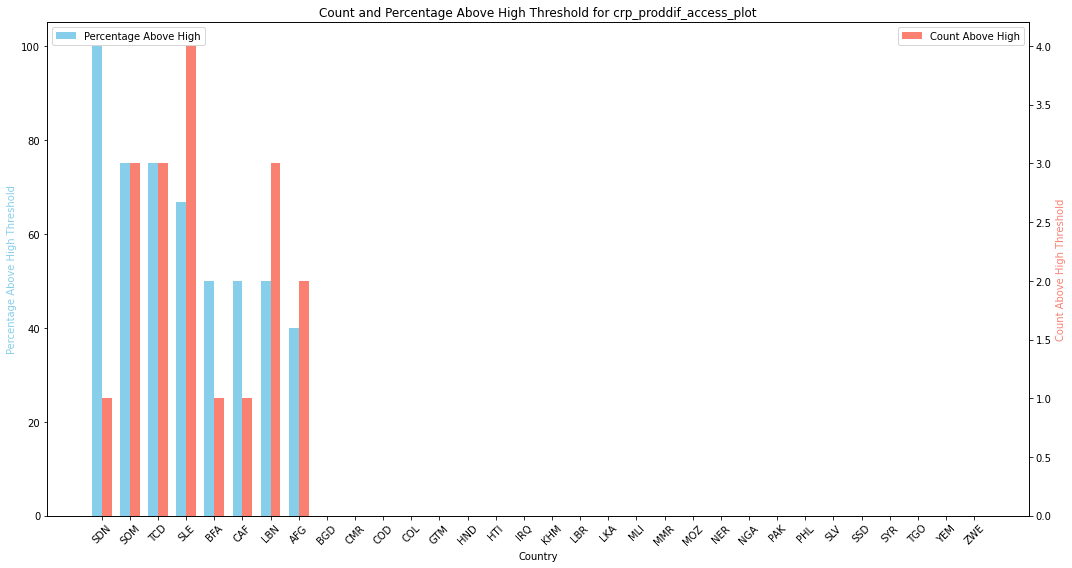

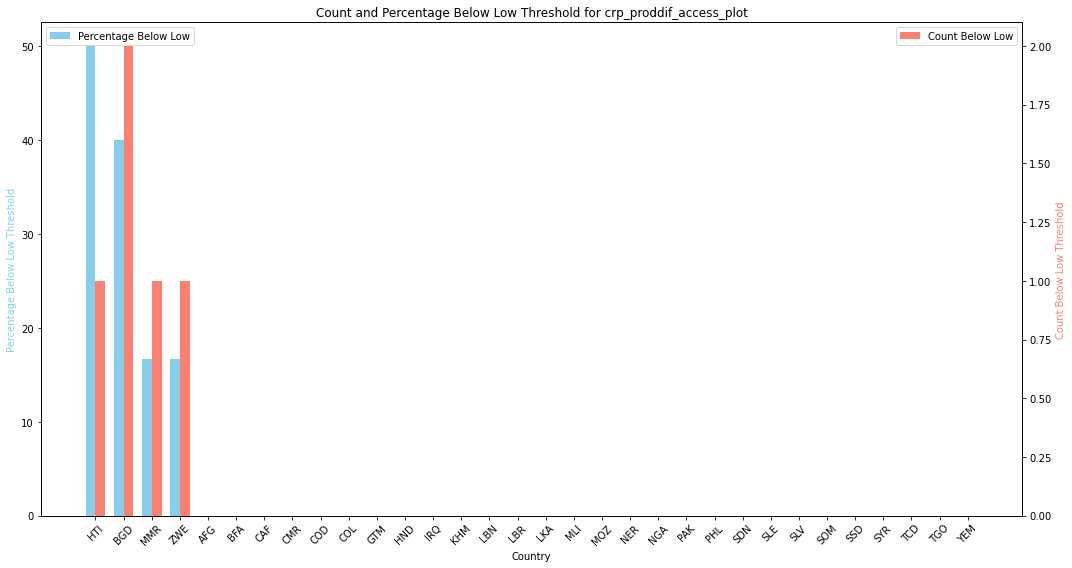


Variable name : crp_proddif_access_fertilize
Variable description : Percentage of households that, for question asked: 'Which difficulty has your household faced with crop production in #season#?', have answered: 'Access to fertilizer (not available on markets or prices too high)'. #season# will be replaced with the country specific information (e.g. wet season, monsoon season, harvest season, etc...).



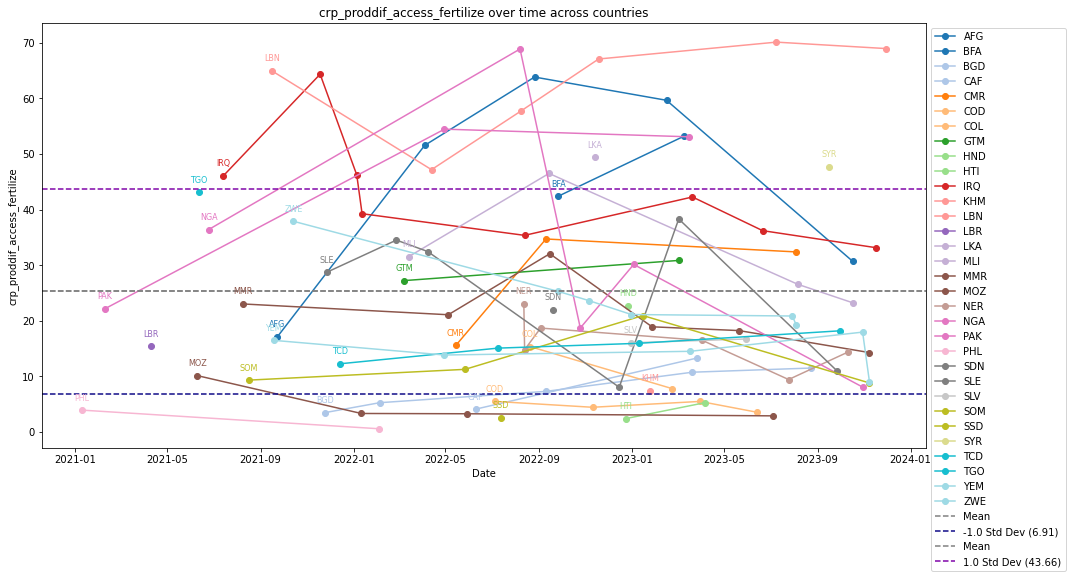

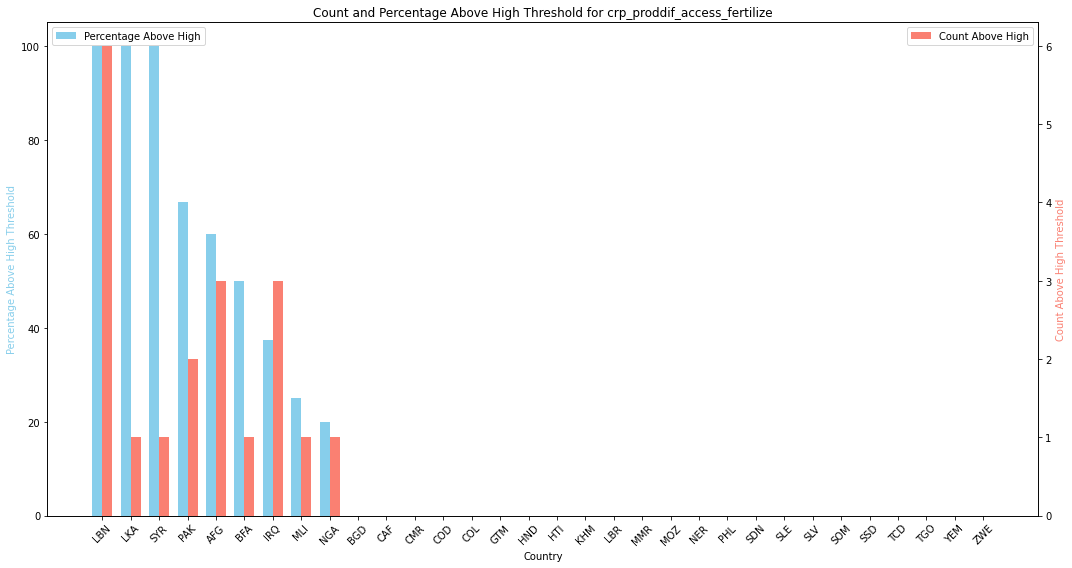

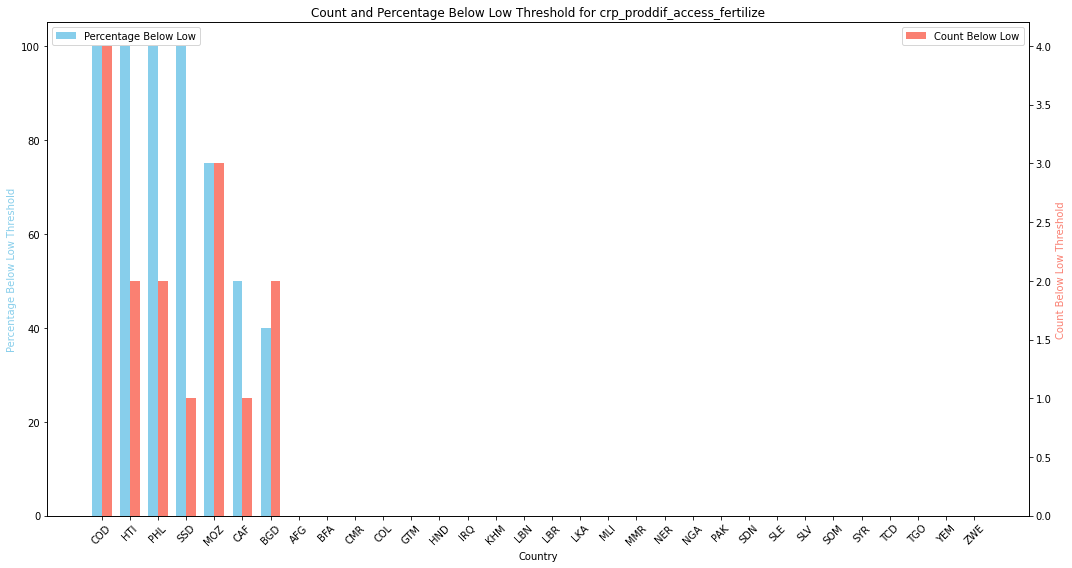


Variable name : crp_proddif_access_pesticide
Variable description : Percentage of households that, for question asked: 'Which difficulty has your household faced with crop production in #season#?', have answered: 'Access to pesticides'. #season# will be replaced with the country specific information (e.g. wet season, monsoon season, harvest season, etc...).



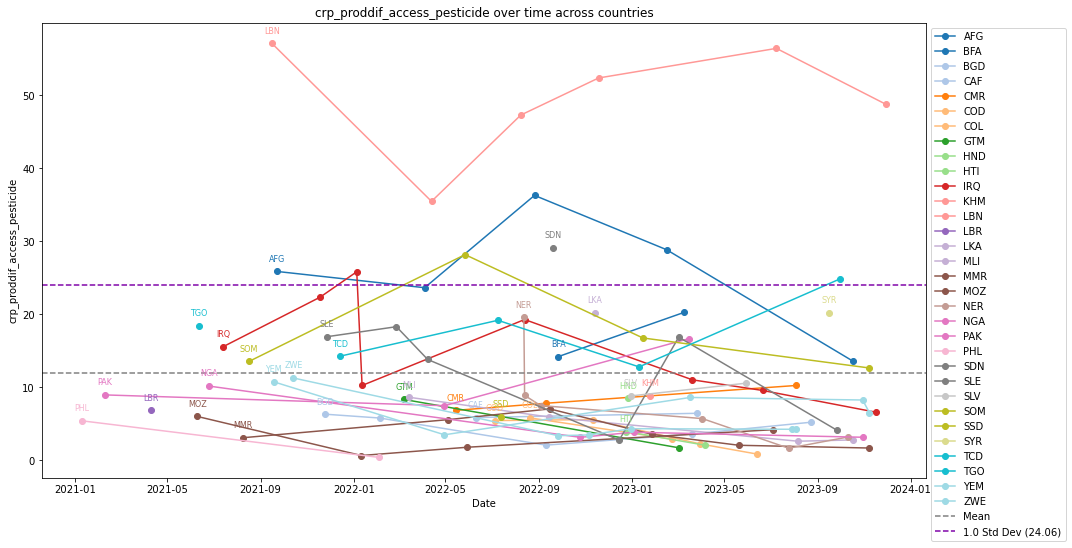

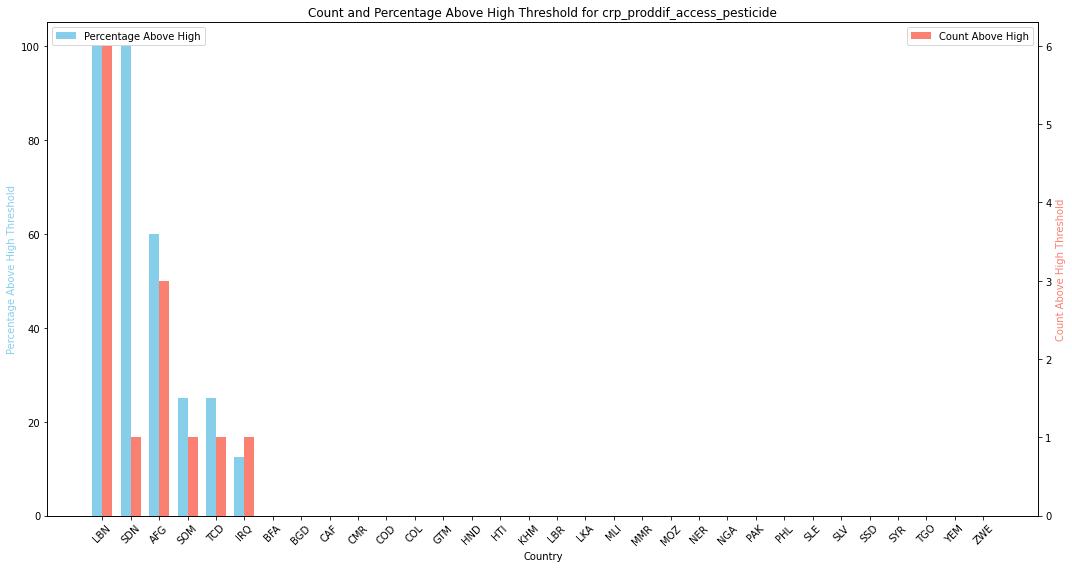

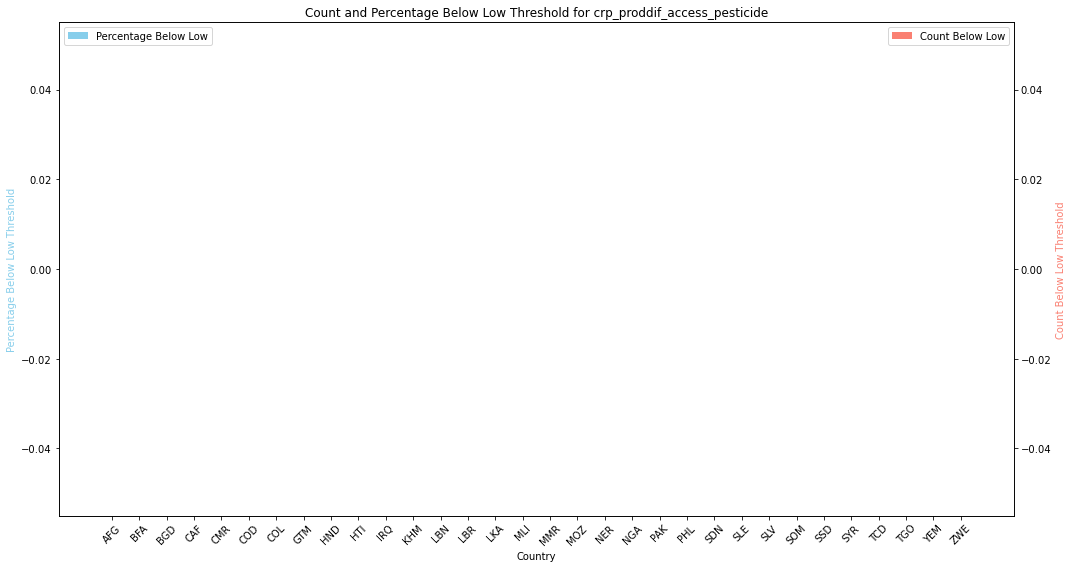


Variable name : crp_proddif_access_labour
Variable description : Percentage of households that, for question asked: 'Which difficulty has your household faced with crop production in #season#?', have answered: 'Access to manpower labour'. #season# will be replaced with the country specific information (e.g. wet season, monsoon season, harvest season, etc...).



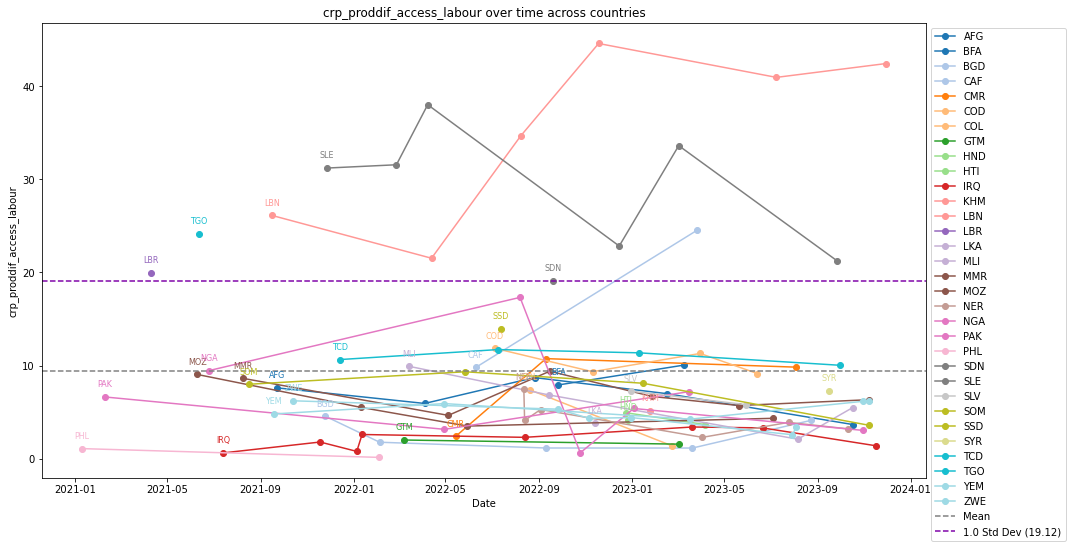

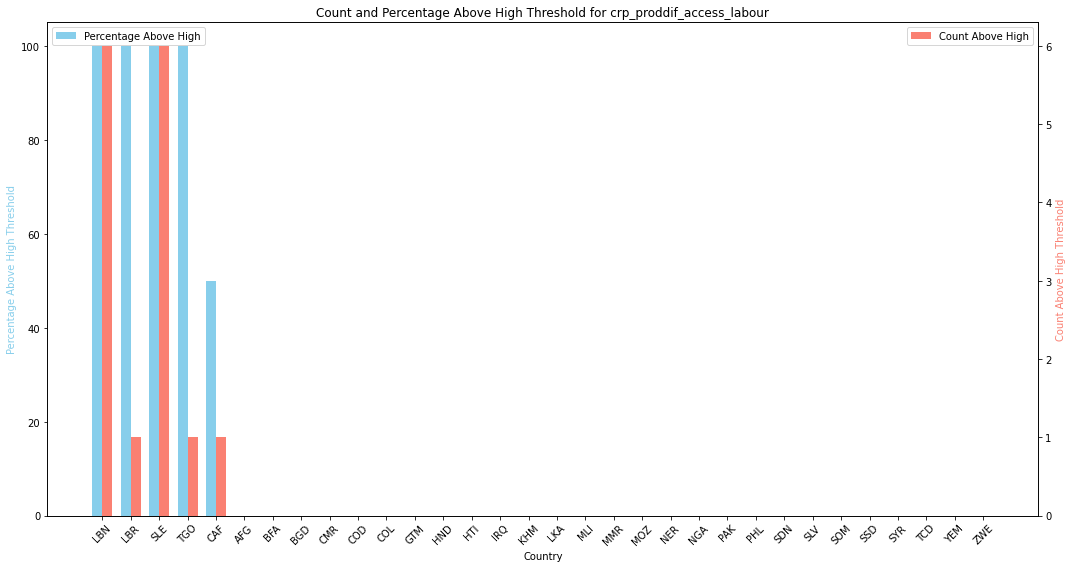

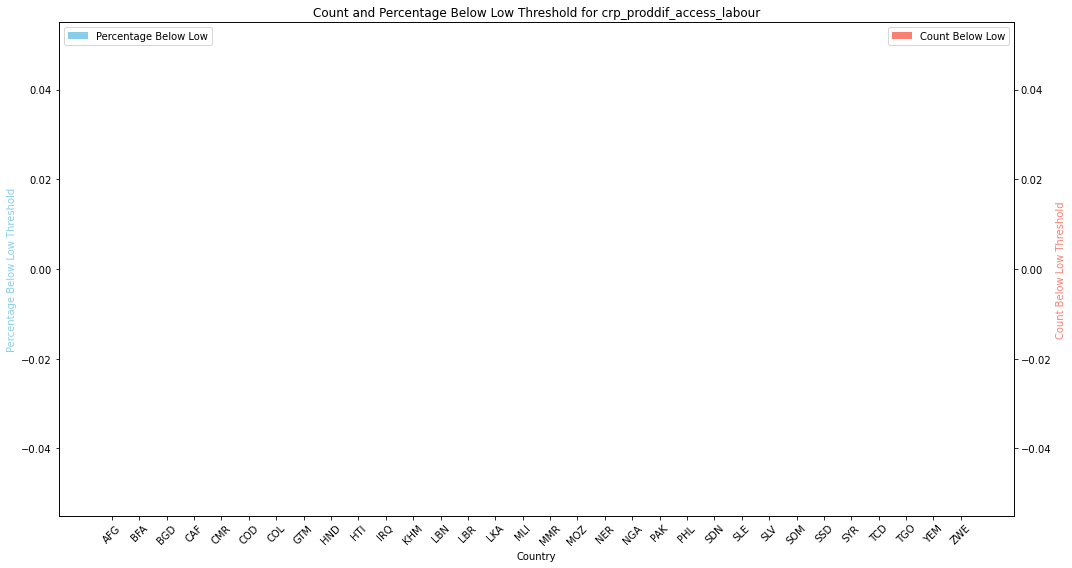


Variable name : crp_proddif_access_machinery
Variable description : Percentage of households that, for question asked: 'Which difficulty has your household faced with crop production in #season#?', have answered: 'Access to machinery, tools or animals for ploughing'. #season# will be replaced with the country specific information (e.g. wet season, monsoon season, harvest season, etc...).



In [ ]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import QuarterEnd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
import statsmodels.api as sm

# User options
percentile = 90  # For the 'percentiles' method
num_std_dev = 1  # For the 'std_dev' method
num_classes = 5  # For the 'equal_interval' method
method = 'std_dev'  # Method for classifying ('percentiles', 'std_dev', 'equal_interval')

# Excel file with variables description path (downloaded from https://hqfao.maps.arcgis.com/sharing/rest/content/items/04287fcadb994341b0b70d19c8a02035/data) 
var_desc_file = r'C:\temp\DIEM_2023_-_Fields_descriptions.xlsx'

# Load the data from the CSV file (downloaded from https://data-in-emergencies.fao.org/datasets/b9080d42e82e4add8130c416f10d0888/explore)
data_file_path = r'C:\temp\diem_monitoring_adm0_allvariables.csv'
df = pd.read_csv(data_file_path)

#Optional: reduce the time window of the analysis
#perform the analysis only on surveys performed with the new version of DIEM questionnaire (deployed on Dec 2022)
# df = df[df["new_infrastructure"] > 0]

# Function to calculate thresholds
def calculate_thresholds(data, percentile=None, num_std_dev=None, method='percentiles'):
    if method == 'percentiles':
        low_percentile = 100 - percentile
        return [np.nanpercentile(data, low_percentile), np.nanpercentile(data, percentile)]
    elif method == 'std_dev':
        mean = data.mean()
        std = data.std()
        return [mean - num_std_dev * std, mean + num_std_dev * std]
    elif method == 'equal_interval':
        min_val, max_val = data.min(), data.max()
        interval = (max_val - min_val) / num_classes
        return [min_val + interval * i for i in range(1, num_classes)]
    else:
        raise ValueError("Invalid method")

# List of countries
countries = df['adm0_iso3'].unique()

# List of variables to plot 
variables = ['crp_proddif_plant_disease','crp_proddif_seed_quality','crp_proddif_seed_quantity','crp_proddif_soil_erosion',
             'crp_proddif_access_plot','crp_proddif_access_fertilize','crp_proddif_access_pesticide','crp_proddif_access_labour','crp_proddif_access_machinery','crp_proddif_access_fuel','crp_proddif_access_credit','crp_proddif_animal_grazing','crp_proddif_excess_water','crp_proddif_lack_irrigation','crp_proddif_pest_outbreak']
# In DIEM dataset, certain questions are conditional and depend on a preceding screening question, 
# thus only a subset of respondents answer them. For accurate cross-country comparisons, 
# we normalize these variables by multiplying them with their corresponding screening question values. 
# This adjustment reflects the proportion of respondents who actually answered these specific questions, 
# ensuring fair and consistent comparisons across varied respondent groups.
screening_variable = 'crp_proddif'

##load fields descriptions
# Load the Excel file
xlsx_var_desc = pd.ExcelFile(var_desc_file)
# Get all sheet names except the first one
sheet_names = xlsx_var_desc.sheet_names[1:]  # Skip the first sheet
# Initialize an empty DataFrame to hold merged data
merged_df = pd.DataFrame()
# Loop through each sheet and extract the table
for sheet in sheet_names:
    desc_df = pd.read_excel(xlsx_var_desc, sheet_name=sheet, header=2)  # Header is at the third row (index 2)
    merged_df = pd.concat([merged_df, desc_df], ignore_index=True)
fields_descr_df = merged_df

field_descriptions = pd.Series(fields_descr_df['Field description'].values, index=fields_descr_df['Field name']).to_dict()

# Initialize dictionaries for total counts and percentages
total_data_points = {country: 0 for country in countries}
percentage_high_extremes = {country: 0 for country in countries}
percentage_low_extremes = {country: 0 for country in countries}
# Initialize dictionaries for cumulative counts and total data points
cumulative_high_counts = {country: 0 for country in countries}
cumulative_low_counts = {country: 0 for country in countries}

# If the 'screening_variable' is not empty, multiply each field by the value of 'screening_variable'. 
# An empty 'screening_variable' indicates that the variables come from questions 
# not associated with a prior screening question.
if screening_variable:
    for variable in variables:
        df[variable] = df[variable] * df[screening_variable] / 100

# Cell 4: Modified Plotting Loop with Threshold Lines, Graded Colors, and Labels
for variable in variables:
    # First, try to get the description using 'variable' as the key.
    # If not found, try appending '_1' to the variable and look again.
    description = field_descriptions.get(variable) or field_descriptions.get(variable + "_1", variable)
    
    # Page Divider and New Indicator Message
    print("\n" + "="*100)
    print("Variable name : %s" % variable)
    if description != variable:
        print("Variable description : %s" % description)
    print("="*100 + "\n")
    
    # Calculate thresholds
    if method == 'percentiles':
        thresholds = calculate_thresholds(df[df[variable] != 0][variable], percentile=percentile, method=method)
    elif method == 'std_dev':
        thresholds = calculate_thresholds(df[df[variable] != 0][variable], num_std_dev=num_std_dev, method=method)
    else:
        thresholds = calculate_thresholds(df[df[variable] != 0][variable], method=method)
    
    highest_threshold = max(thresholds)
    
    # Calculate mean and standard deviation if method is std_dev
    if method == 'std_dev':
        mean_value = df[df[variable] != 0][variable].mean()
        std_dev = df[df[variable] != 0][variable].std()
    else:
        mean_value, std_dev = None, None

    # Calculate the mean if method is std_dev
    mean_value = df[df[variable] != 0][variable].mean() if method == 'std_dev' else None
    
    # Determine y-axis range for the current variable with a margin
    y_min = df[df[variable] != 0][variable].min()
    y_max = df[df[variable] != 0][variable].max()
    y_range = y_max - y_min
    margin = 0.05 * y_range  # 5% margin

    # Create a figure for the current indicator
    plt.figure(figsize=(15, 8))

    # Generate a larger set of distinct colors for countries
    country_colors = cm.get_cmap('tab20', len(countries))(range(len(countries)))

    # Generate colors for thresholds
    threshold_colors = cm.get_cmap('plasma', num_classes)(range(num_classes))
    legend_handles = []
    sorted_countries = sorted(countries)
    for i, country in enumerate(sorted_countries):
        # Filter data for the current country
        country_data = df[(df['adm0_iso3'] == country) & (df[variable].notnull()) & (df[variable] != 0)].copy()

        # Check the number of unique rounds for the current country
        unique_rounds = country_data['round'].nunique()
#         if unique_rounds <= 1:
#             continue  # Skip plotting for countries with only one round

        # Convert coll_end_date to datetime and sort by date
        country_data['coll_end_date'] = pd.to_datetime(country_data['coll_end_date'])
        country_data = country_data.sort_values(by='coll_end_date')

        # Plotting for each country on the same chart
        line, = plt.plot(country_data['coll_end_date'], country_data[variable], marker='o', color=country_colors[i], label=country)

        # Add label at the beginning of the line
        if len(country_data) > 0:
            first_point = country_data.iloc[0]
            text = plt.annotate(country, (first_point['coll_end_date'], first_point[variable]),
                                textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color=line.get_color())
            #text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])

    # Enhanced labels for thresholds
    for i, threshold in enumerate(thresholds):
        # Check if threshold is within the y-axis range
        if y_min <= threshold <= y_max:
            if method == 'percentiles':
                if i == 0:
                    label = f'{100 - percentile}th Percentile ({threshold:.2f})'
                else:
                    label = f'{percentile}th Percentile ({threshold:.2f})'
            elif method == 'std_dev':
                std_devs_from_mean = (threshold - mean_value) / std_dev
                label = 'Mean' if std_devs_from_mean == 0 else f'{std_devs_from_mean:.1f} Std Dev ({threshold:.2f})'
                plt.axhline(y=mean_value, color='grey', linestyle='--', label='Mean')
            elif method == 'equal_interval':
                interval_range = (thresholds[-1] - thresholds[0]) / (num_classes - 1)
                interval_start = thresholds[0] + i * interval_range
                label = f'Interval {i+1}: [{interval_start:.2f}, {threshold:.2f})'

            plt.axhline(y=threshold, color=threshold_colors[i], linestyle='--', label=label)

    # Annotating the plot with labels, title, and legends
    plt.title(f'{variable} over time across countries')
    plt.xlabel('Date')
    plt.ylabel(variable)
    # Extend y-axis limits
    plt.ylim(y_min - margin, y_max + margin)  # Add margin to y-axis limits

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of the plot
    plt.tight_layout()
    plt.show()  # Display the plot
    
    # Histogram calculation for counts and percentages at high and low extremes
    country_high_counts, country_low_counts = {}, {}
    country_high_percentages, country_low_percentages = {}, {}
    low_threshold, high_threshold = min(thresholds), max(thresholds)

    for country in countries:
        country_data = df[(df['adm0_iso3'] == country) & (df[variable].notnull()) & (df[variable] != 0)]
        high_count = sum(country_data[variable] > high_threshold)
        low_count = sum(country_data[variable] < low_threshold)
        data_count = len(country_data)

        cumulative_high_counts[country] += high_count
        cumulative_low_counts[country] += low_count
        total_data_points[country] += data_count
       
        country_high_counts[country] = high_count
        country_low_counts[country] = low_count
        country_high_percentages[country] = (high_count / data_count) * 100 if data_count > 0 else 0
        country_low_percentages[country] = (low_count / data_count) * 100 if data_count > 0 else 0
        
    # Calculate percentages
    for country in countries:
        if total_data_points[country] > 0:
            percentage_high_extremes[country] = (cumulative_high_counts[country] / total_data_points[country]) * 100
            percentage_low_extremes[country] = (cumulative_low_counts[country] / total_data_points[country]) * 100


    # Sorting data by high and low percentages
    sorted_countries_high = sorted(country_high_percentages, key=country_high_percentages.get, reverse=True)
    sorted_high_counts = [country_high_counts[country] for country in sorted_countries_high]
    sorted_high_percentages = [country_high_percentages[country] for country in sorted_countries_high]

    sorted_countries_low = sorted(country_low_percentages, key=country_low_percentages.get, reverse=True)
    sorted_low_counts = [country_low_counts[country] for country in sorted_countries_low]
    sorted_low_percentages = [country_low_percentages[country] for country in sorted_countries_low]

    # Plotting Histogram for High Thresholds
    fig, ax1_high = plt.subplots(figsize=(15, 8))
    ax2_high = ax1_high.twinx()
    x_high = np.arange(len(sorted_countries_high))  # label locations
    width = 0.35  # width of the bars

    ax1_high.bar(x_high - width/2, sorted_high_percentages, width, label='Percentage Above High', color='skyblue')
    ax2_high.bar(x_high + width/2, sorted_high_counts, width, label='Count Above High', color='salmon')

    ax1_high.set_xlabel('Country')
    ax1_high.set_ylabel('Percentage Above High Threshold', color='skyblue')
    ax2_high.set_ylabel('Count Above High Threshold', color='salmon')
    ax1_high.set_title(f'Count and Percentage Above High Threshold for {variable}')
    ax1_high.set_xticks(x_high)
    ax1_high.set_xticklabels(sorted_countries_high, rotation=45)
    ax1_high.legend(loc='upper left')
    ax2_high.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # Plotting Histogram for Low Thresholds
    fig, ax1_low = plt.subplots(figsize=(15, 8))
    ax2_low = ax1_low.twinx()
    x_low = np.arange(len(sorted_countries_low))  # label locations

    ax1_low.bar(x_low - width/2, sorted_low_percentages, width, label='Percentage Below Low', color='skyblue')
    ax2_low.bar(x_low + width/2, sorted_low_counts, width, label='Count Below Low', color='salmon')

    ax1_low.set_xlabel('Country')
    ax1_low.set_ylabel('Percentage Below Low Threshold', color='skyblue')
    ax2_low.set_ylabel('Count Below Low Threshold', color='salmon')
    ax1_low.set_title(f'Count and Percentage Below Low Threshold for {variable}')
    ax1_low.set_xticks(x_low)
    ax1_low.set_xticklabels(sorted_countries_low, rotation=45)
    ax1_low.legend(loc='upper left')
    ax2_low.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
    


## Section 2: Cumulative Chart Analysis

After analyzing individual variables, the script aggregates the results at the **"Crop production difficulties"** Thematic Area level, to create a comprehensive cumulative chart. This chart visualizes both the counts and the percentages of data points falling into high and low extreme ranges across all indicators for each country.

This cumulative chart offers a holistic view of each country's performance across all surveyed indicators, highlighting those frequently experiencing extreme conditions.



In [ ]:
# Sorting countries based on cumulative high percentages
sorted_countries = sorted(percentage_high_extremes, key=percentage_high_extremes.get, reverse=True)
sorted_cumulative_highs = [cumulative_high_counts[country] for country in sorted_countries]
sorted_percent_highs = [percentage_high_extremes[country] for country in sorted_countries]
sorted_cumulative_lows = [cumulative_low_counts[country] for country in sorted_countries]
sorted_percent_lows = [percentage_low_extremes[country] for country in sorted_countries]


# Plotting the final cumulative chart with counts and percentages
fig, ax1 = plt.subplots(figsize=(20, 12))
ax2 = ax1.twinx()  # Secondary axis for percentages

# Bar positions and width
x = np.arange(len(sorted_countries))
bar_width = 0.3
spacing = 0.1  # Additional spacing between groups

# Plotting bars for high extremes
high_bars_count = ax1.bar(x - bar_width / 2 - spacing, sorted_cumulative_highs, bar_width, label='High Extremes Count', color='darkred')
high_bars_percent = ax2.bar(x - bar_width / 2 - spacing, sorted_percent_highs, bar_width, label='High Extremes Percentage', color='salmon', alpha=0.7)

# Plotting bars for low extremes
low_bars_count = ax1.bar(x + bar_width / 2 + spacing, sorted_cumulative_lows, bar_width, label='Low Extremes Count', color='darkblue', alpha=0.7)
low_bars_percent = ax2.bar(x + bar_width / 2 + spacing, sorted_percent_lows, bar_width, label='Low Extremes Percentage', color='lightblue', alpha=0.7)

# Adding labels on bars
def add_labels(bars, axis, is_percentage=False):
    for bar in bars:
        height = bar.get_height()
        label = '{:.1f}%'.format(height) if is_percentage else '{}'.format(int(height))
        axis.annotate(label,
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(high_bars_count, ax1)
add_labels(high_bars_percent, ax2, is_percentage=True)
add_labels(low_bars_count, ax1)
add_labels(low_bars_percent, ax2, is_percentage=True)

# Adding labels, title, and legends
ax1.set_xlabel('Country', fontsize=14)
ax1.set_ylabel('Extremes Count', fontsize=14, color='black')
ax2.set_ylabel('Extremes Percentage (%)', fontsize=14, color='black')
ax1.set_title('Cumulative Extremes Count and Percentage Across All Indicators of the Thematic Area', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_countries, rotation=45, fontsize=12)

# Moving the legend below the chart
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=12)

# Adjusting layout for better fit
plt.tight_layout()
plt.show()


## Section 3: Overall Negative Extremes Analysis

This section of the script focuses on identifying and visualizing the frequency and count of 'negative' extremes across all indicators for each country. A 'negative' extreme is defined as a value that falls in the undesirable range for an indicator (e.g., too low for beneficial indicators or too high for detrimental indicators). The process includes:

1. **Defining User Options**: Setting the method of classification (percentiles or standard deviation) and specifying variables where high values are considered positive.

2. **Loading Data**: The script loads the data from a specified CSV file and initializes dictionaries for cumulative bad counts and total data points for each country.

3. **Analysis Loop**:
   - For each variable, thresholds are calculated based on the chosen method.
   - For each country, the script counts the number of times the data for a variable falls into a 'negative' extreme range.
   - These counts are accumulated in the `cumulative_bad_counts` dictionary.

4. **Calculating Percentages**: The script calculates the percentage of data points that fall into 'negative' extremes for each country.

5. **Creating the Negative Extremes Chart**:
   - Sorts countries based on cumulative bad percentages.
   - Initializes a figure with two axes for counts and percentages.
   - Plots bars representing the count and percentage of negative extremes for each country.
   - Adds labels on each bar to display exact values.
   
6. **Classifying Countries into Areas of Concern**:
   - After plotting the chart, countries are classified into five distinct areas of concern, ranging from 'Not Critical' to 'Very Severe'. This classification is based on the percentage of negative extremes.
   - Each area represents a different level of severity regarding the challenges faced by the countries in the respective indicators.
   - Countries are assigned colors corresponding to these areas. For example, a country falling into the 'Very Severe' area would be colored red, indicating a high frequency of negative extremes.
   - This visual classification helps in quickly identifying countries that are most affected and may need urgent attention or resources.
   - This process of classification and color assignment is repeated for each of the seven thematic areas. The result is a comprehensive and visually intuitive ranking of each country within each thematic area, providing a clear perspective on where each country stands in terms of facing challenges across various indicators.


This chart provides crucial insights into which countries frequently encounter undesirable conditions across various indicators, highlighting areas that might require attention or intervention.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects  # Import path_effects


# User options
percentile = 90  # For the 'percentiles' method
num_std_dev = 1  # For the 'std_dev' method
num_classes = 5  # For the 'equal_interval' method
method = 'std_dev'  # Method for classifying ('percentiles', 'std_dev', 'equal_interval')
positive_high_value_vars = ['lcsi_0', 'hdds_class_3', 'assistance_quality_1']  # List of variables where high values are positive
# Define severity labels
severity_labels = ['Not Critical', 'Mild Concern', 'Moderate Concern', 'High Concern', 'Very Severe']



# Load data
file_path = r'C:\temp\diem_monitoring_adm0_allvariables.csv'
df = pd.read_csv(file_path)
countries = df['adm0_iso3'].unique()

#Optional: reduce the time window of the analysis
#perform the analysis only on surveys performed with the new version of DIEM questionnaire (deployed on Dec 2022)
# df = df[df["new_infrastructure"] > 0]

# In our dataset, certain questions are conditional and depend on a preceding screening question,
# thus only a subset of respondents answer them. For accurate cross-country comparisons,
# we normalize these variables by multiplying them with their corresponding screening question values.
# This adjustment reflects the proportion of respondents who actually answered these specific questions,
# ensuring fair and consistent comparisons across varied respondent groups.

screening_variable_crpproddif  = 'crp_proddif' #Crop production difficulties
# List of variables to plot
variables_crpproddif = ['crp_proddif_plant_disease','crp_proddif_seed_quality','crp_proddif_seed_quantity','crp_proddif_soil_erosion',
             'crp_proddif_access_plot','crp_proddif_access_fertilize','crp_proddif_access_pesticide','crp_proddif_access_labour',
             'crp_proddif_access_machinery','crp_proddif_access_fuel','crp_proddif_access_credit','crp_proddif_animal_grazing',
             'crp_proddif_excess_water','crp_proddif_lack_irrigation','crp_proddif_pest_outbreak']

screening_variable_crpsaledif = 'crp_salesdif' #Crop sales difficulties
# List of variables to plot
variables_crpsaledif = ['crp_saledif_competition','crp_saledif_damage_losses','crp_saledif_low_demand','crp_saledif_low_price',
                 'crp_saledif_marketing_cost','crp_saledif_pay_delay','crp_saledif_processing',]


screening_variable_lsproddif = 'ls_proddif' #Livestock production difficulties
# List of variables to plot
variables_lsproddif = ['ls_proddif_access_credit','ls_proddif_access_labour','ls_proddif_access_market','ls_proddif_access_pasture',
                'ls_proddif_access_water','ls_proddif_diseases','ls_proddif_feed_purchase','ls_proddif_theft',
                'ls_proddif_vet_input','ls_proddif_vet_serv']

screening_variable_lssaledif = 'ls_salesdif' #Livestock sales difficulties
# List of variables to plot
variables_lssaledif = ['ls_salesdif_competition','ls_salesdif_damage_losses','ls_salesdif_low_demand',
                       'ls_salesdif_low_price','ls_salesdif_marketing_cost','ls_salesdif_pay_delay','ls_salesdif_processing','ls_salesdif_slaughterhouse']

screening_variable_shocks = '' #Shocks experienced 
# List of variables to plot
variables_shocks = ['shock_drought','shock_flood','shock_earthquake','shock_pestoutbreak','shock_plantdisease',
                    'shock_animaldisease','shock_violenceinsecconf','shock_lostemplorwork','shock_higherfuelprices',
                    'shock_higherfoodprices','shock_napasture','shock_theftofprodassets','shock_mvtrestrict',
                    'shock_sicknessordeathofhh','shock_coldtemporhail','shock_landslides']

screening_variable_needs = 'need' #Needs reported
# List of variables to plot
variables_needs = ['need_crop_inputs','need_crop_infrastructure','need_ls_feed','need_ls_vet_service',
                   'need_ls_infrastructure','need_ls_knowledge','need_crop_knowledge','need_cash',
                   'need_cold_storage','need_env_infra_rehab','need_food','need_marketing_supp','need_vouchers_fair']

screening_variable_FS = '' #Food Security outcomes
# List of variables to plot
variables_FS = ['p_mod_wmean', 'p_sev_wmean', 'hdds_class_1', 'hdds_class_3',
                   'lcsi_0', 'lcsi_3']

thematic_areas_var_groups = {"Crop production difficulties": [variables_crpproddif, screening_variable_crpproddif],
                             "Crop sales difficulties": [variables_crpsaledif,screening_variable_crpsaledif],
                             "Livestock production difficulties": [variables_lsproddif,screening_variable_lsproddif],
                             "Livestock sales difficulties": [variables_lssaledif,screening_variable_lssaledif],
                            "Shocks": [variables_shocks,screening_variable_shocks],
                            "Needs": [variables_needs, screening_variable_needs],
                             "Food security outcomes": [variables_FS,screening_variable_FS]}

# Function to calculate thresholds
def calculate_thresholds(data, percentile=None, num_std_dev=None, method='percentiles'):
    if method == 'percentiles':
        low_percentile = 100 - percentile
        return [np.nanpercentile(data, low_percentile), np.nanpercentile(data, percentile)]
    elif method == 'std_dev':
        mean = data.mean()
        std = data.std()
        return [mean - num_std_dev * std, mean + num_std_dev * std]
    elif method == 'equal_interval':
        min_val, max_val = data.min(), data.max()
        interval = (max_val - min_val) / num_classes
        return [min_val + interval * i for i in range(1, num_classes)]
    else:
        raise ValueError("Invalid method")


# Function to classify data into equal intervals
def classify_by_equal_interval(data, num_classes=5):
    min_val = data.min()
    max_val = data.max()
    interval = (max_val - min_val) / num_classes

    # Create class boundaries
    class_boundaries = [min_val + i * interval for i in range(num_classes + 1)]
    return class_boundaries

# Function to add a dark halo effect to text for better readability
def add_halo_effect(text_obj):
    text_obj.set_path_effects([path_effects.withStroke(linewidth=0.5, foreground='black')])


for thematic_area_name, [variables, screening_variable] in thematic_areas_var_groups.items():

    # Page Divider and New Thematic Area Message
    print("\n" + "="*100)
    print("Analysis for thematic area: ", thematic_area_name)
    print("Variables considered : %s" % variables)
    print("="*100 + "\n")   
    
    # Initialize dictionaries
    cumulative_bad_counts = {country: 0 for country in countries}
    total_data_points = {country: 0 for country in countries}

    # If the 'screening_variable' is not empty, multiply each field by the value of 'screening_variable'.
    # An empty 'screening_variable' indicates that the variables come from questions
    # not associated with a prior screening question.
    if screening_variable:
        for variable in variables:
            df[variable] = df[variable] * df[screening_variable] / 100

    # Analysis loop
    for variable in variables:
        # Calculate thresholds
        if method == 'percentiles':
            thresholds = calculate_thresholds(df[df[variable] != 0][variable], percentile=percentile, method=method)
        elif method == 'std_dev':
            thresholds = calculate_thresholds(df[df[variable] != 0][variable], num_std_dev=num_std_dev, method=method)
        else:
            thresholds = calculate_thresholds(df[df[variable] != 0][variable], method=method)

        high_threshold = max(thresholds)
        low_threshold = min(thresholds)

        for country in countries:
            country_data = df[(df['adm0_iso3'] == country) & (df[variable].notnull()) & (df[variable] != 0)]
            if variable in positive_high_value_vars:
                bad_count = sum(country_data[variable] < low_threshold)
            else:
                bad_count = sum(country_data[variable] > high_threshold)

            cumulative_bad_counts[country] += bad_count
            total_data_points[country] += len(country_data)

    # Calculate percentages
    percentage_bad_extremes = {country: (cumulative_bad_counts[country] / total_data_points[country]) * 100 if total_data_points[country] > 0 else 0 for country in countries}

    # Sorting countries based on cumulative bad percentages
    sorted_countries_by_percentage = sorted(percentage_bad_extremes, key=percentage_bad_extremes.get, reverse=True)
    sorted_bad_counts_by_percentage = [cumulative_bad_counts[country] for country in sorted_countries_by_percentage]
    sorted_bad_percentages_by_percentage = [percentage_bad_extremes[country] for country in sorted_countries_by_percentage]

    # Example usage of the function
    country_classification = classify_by_equal_interval(pd.Series(percentage_bad_extremes), num_classes=num_classes)
    # Printing the class boundaries
    print("Class boundaries:", country_classification)

    # Assign a color for each class
    class_colors = ['green', 'yellowgreen', 'yellow', 'orange', 'red']

    # Determine the classification of each country
    country_class_indices = pd.cut(pd.Series(percentage_bad_extremes), bins=country_classification, labels=False, include_lowest=True)

    # Assign labels to class boundaries
    label_positions = [(country_classification[i] + country_classification[i + 1]) / 2 for i in range(len(country_classification) - 1)]

    # Plotting the final chart
    fig, ax1 = plt.subplots(figsize=(20, 12))
    ax2 = ax1.twinx()

    x = np.arange(len(sorted_countries_by_percentage))
    bar_width = 0.35

    # Plotting bars for counts and percentages
    count_bars = ax1.bar(x - bar_width/2, sorted_bad_counts_by_percentage, bar_width, color='red', label='Negative Extremes Count')
    percent_bars = ax2.bar(x + bar_width/2, sorted_bad_percentages_by_percentage, bar_width, color='blue', alpha=0.7, label='Negative Extremes Percentage (%)')

    # Function to add labels to the bars
    def add_bar_labels(bars, axis, is_percent=False):
        for idx, bar in enumerate(bars):
            height = bar.get_height()
            label = f'{height:.1f}%' if is_percent else f'{int(height)}'

            # Adjust vertical offset for the first bar
            if idx == 0:  # Check if it's the first bar
                vertical_offset = 0 if is_percent else 10  # Adjust offset for percent and count differently
            else:
                vertical_offset = 3  # Default offset for other bars

            axis.annotate(label,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, vertical_offset),  # Adjusted vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

    # Adding labels on the bars
    add_bar_labels(count_bars, ax1)
    add_bar_labels(percent_bars, ax2, is_percent=True)

    # Adding class boundaries to the chart
    for boundary in country_classification:
        ax2.axhline(y=boundary, color='grey', linestyle='--', alpha=0.7)

    # Adding severity labels to the chart
    for pos, label in zip(label_positions, severity_labels):
        ax2.text(len(sorted_countries_by_percentage) - 1, pos, label, ha='right', va='center', fontsize=12, color='black', style='italic')

    # Setting labels, title, and legend
    ax1.set_xlabel('Country', fontsize=14)
    ax2.set_ylabel('Negative Extremes Count', fontsize=14, color='black')
    ax1.set_ylabel('Negative Extremes Percentage (%)', fontsize=14, color='black')
    ax1.set_title('Cumulative Negative Extremes Count and Percentage Across All Indicators (%s)' % thematic_area_name, fontsize=16)
    ax1.set_xticks(x)
    ax1.set_xticklabels(sorted_countries_by_percentage, rotation=45, fontsize=12)

    # Setting colored x-tick labels based on classification
    for i, country in enumerate(sorted_countries_by_percentage):
        ax1.get_xticklabels()[i].set_color(class_colors[country_class_indices[country]])

    # Apply the halo effect to each x-tick label
    for tick_label in ax1.get_xticklabels():
        add_halo_effect(tick_label)

    # Moving the legend below the chart
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(handles1 + handles2, labels1 + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4, fontsize=12)

    plt.tight_layout()
    plt.show()